In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("all_responses_coded.csv", index_col=0)

In [3]:
df.head()

,initial_order,initial_index,session_id,study_id,study_name,scenario_id,scenario_code,story_id,chat_id,story_common_id,...,content,role,function_call,tool_calls,language_category,is_correct,has_correct_reasoning,is_beyond_scope,has_grammatical_error,needs_debating
0,679,3896,109,1,Ullman Replication,1.0,1-EN/1,1-EN,1.0,1,...,Sam believes that the bag is full of chocolate.,assistant,NaN,NaN,English,True,NaN,False,False,False
1,849,4066,189,1,Ullman Replication,1.0,1-EN/1,1-EN,1.0,1,...,chocolate.,assistant,NaN,NaN,English,True,NaN,False,False,False
2,1019,4327,269,1,Ullman Replication,1.0,1-EN/1,1-EN,1.0,1,...,chocolate.,assistant,NaN,NaN,English,True,NaN,False,False,False
3,1189,4497,349,1,Ullman Replication,1.0,1-EN/1,1-EN,1.0,1,...,Sam believes that the bag is full of chocolate.,assistant,NaN,NaN,English,True,NaN,False,False,False
4,1359,4667,429,1,Ullman Replication,1.0,1-EN/1,1-EN,1.0,1,...,chocolate,assistant,NaN,NaN,English,True,NaN,False,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6560 entries, 0 to 6559
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   initial_order            6560 non-null   int64  
 1   initial_index            6560 non-null   int64  
 2   session_id               6560 non-null   int64  
 3   study_id                 6560 non-null   int64  
 4   study_name               6560 non-null   object 
 5   scenario_id              6560 non-null   float64
 6   scenario_code            6560 non-null   object 
 7   story_id                 6560 non-null   object 
 8   chat_id                  6560 non-null   float64
 9   story_common_id          6560 non-null   object 
 10  story_category           6560 non-null   object 
 11  story_name               6560 non-null   object 
 12  story_content            6560 non-null   object 
 13  story_language           6560 non-null   object 
 14  chat_name                6560

In [5]:
df.columns

Index(['initial_order', 'initial_index', 'session_id', 'study_id',
       'study_name', 'scenario_id', 'scenario_code', 'story_id', 'chat_id',
       'story_common_id', 'story_category', 'story_name', 'story_content',
       'story_language', 'chat_name', 'chat_language', 'chat_has_fbv_zan',
       'chat_has_fbv_san', 'questions', 'system_message_id',
       'system_message_language', 'system_message_content', 'question_index',
       'question_id', 'question_common_id', 'question_content',
       'question_type', 'question_language', 'question_has_fbv_zan',
       'question_has_fbv_san', 'question_tom_order', 'question_tom_type',
       'answer_id', 'answer_correct', 'id', 'created', 'model', 'object',
       'system_fingerprint', 'completion_tokens', 'prompt_tokens',
       'total_tokens', 'content', 'role', 'function_call', 'tool_calls',
       'language_category', 'is_correct', 'has_correct_reasoning',
       'is_beyond_scope', 'has_grammatical_error', 'needs_debating'],
      dtyp

In [6]:
df[(df["study_id"] == 3) & (df["question_tom_type"].isin(["Belief", "Thought", "Explanation"]))].groupby("language_category")["question_common_id"].value_counts().to_excel("questions.xlsx")

In [7]:
def produce_analysis_frame(
        df: pd.DataFrame
        ) -> tuple[list[pd.DataFrame], dict[str, dict[int, str]]]:
    
    analysis_columns = [
        "initial_order",
        "initial_index",
        "session_id",
        "story_category",
        "story_id",
        "story_common_id",
        "question_id",
        "question_common_id",
        "story_language",
        "language_category",
        "model",
        "question_tom_type",
        "content",
        "is_correct",
        "has_correct_reasoning",
        "is_beyond_scope"
    ]
    
    label_encoding_columns = [
        "story_category",
        "story_common_id",
        "story_language",
        "language_category",
        "model",
        "question_tom_type"
    ]
    
    label_encoding_codes = dict(
        df[label_encoding_columns].apply(lambda column: dict(
            enumerate(
                column.astype("category").cat.categories
                )
            )
        )
    )

    analysis_df = df.loc[:, analysis_columns]

    analysis_df.loc[:, label_encoding_columns] = analysis_df[label_encoding_columns] \
            .apply(lambda column: column.astype("category").cat.codes)
    
    analysis_df.loc[:, ["is_correct", "has_correct_reasoning", "is_beyond_scope"]] = analysis_df[["is_correct", "has_correct_reasoning", "is_beyond_scope"]].astype("Int64")

    studies = []
    
    for study_id in [1, 2, 3]:
        study_df = analysis_df.loc[df["study_id"] == study_id]
        studies.append(study_df)

    return (studies, label_encoding_codes)

In [8]:
studies, label_codes = produce_analysis_frame(df)

In [9]:
studies[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   initial_order          1200 non-null   int64  
 1   initial_index          1200 non-null   int64  
 2   session_id             1200 non-null   int64  
 3   story_category         1200 non-null   object 
 4   story_id               1200 non-null   object 
 5   story_common_id        1200 non-null   object 
 6   question_id            1200 non-null   object 
 7   question_common_id     1200 non-null   float64
 8   story_language         1200 non-null   object 
 9   language_category      1200 non-null   object 
 10  model                  1200 non-null   object 
 11  question_tom_type      1200 non-null   object 
 12  content                1200 non-null   object 
 13  is_correct             1200 non-null   Int64  
 14  has_correct_reasoning  112 non-null    object 
 15  is_beyond

In [10]:
studies[1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3200 entries, 1200 to 4399
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   initial_order          3200 non-null   int64  
 1   initial_index          3200 non-null   int64  
 2   session_id             3200 non-null   int64  
 3   story_category         3200 non-null   object 
 4   story_id               3200 non-null   object 
 5   story_common_id        3200 non-null   object 
 6   question_id            3200 non-null   object 
 7   question_common_id     3200 non-null   float64
 8   story_language         3200 non-null   object 
 9   language_category      3200 non-null   object 
 10  model                  3200 non-null   object 
 11  question_tom_type      3200 non-null   object 
 12  content                3200 non-null   object 
 13  is_correct             3200 non-null   Int64  
 14  has_correct_reasoning  907 non-null    object 
 15  is_bey

In [11]:
studies[2].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 4400 to 6559
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   initial_order          2160 non-null   int64  
 1   initial_index          2160 non-null   int64  
 2   session_id             2160 non-null   int64  
 3   story_category         2160 non-null   object 
 4   story_id               2160 non-null   object 
 5   story_common_id        2160 non-null   object 
 6   question_id            2160 non-null   object 
 7   question_common_id     2160 non-null   float64
 8   story_language         2160 non-null   object 
 9   language_category      2160 non-null   object 
 10  model                  2160 non-null   object 
 11  question_tom_type      2160 non-null   object 
 12  content                2160 non-null   object 
 13  is_correct             2160 non-null   Int64  
 14  has_correct_reasoning  872 non-null    object 
 15  is_bey

In [12]:
label_codes

{'story_category': {0: 'Unexpected Contents', 1: 'Unexpected Transfer'},
 'story_common_id': {0: '1',
  1: '1A',
  2: '1B',
  3: '1C',
  4: '1D',
  5: '2',
  6: '2A',
  7: '2B',
  8: '2C',
  9: '2D',
  10: '3A',
  11: '3B',
  12: '4A',
  13: '4B'},
 'story_language': {0: 'English', 1: 'Turkish'},
 'language_category': {0: 'English',
  1: 'Turkish',
  2: 'Turkish-san',
  3: 'Turkish-zan'},
 'model': {0: 'gpt-3.5-turbo-0613', 1: 'gpt-4-1106-preview'},
 'question_tom_type': {0: 'Action',
  1: 'Belief',
  2: 'Explanation',
  3: 'Knowledge',
  4: 'Reality',
  5: 'Thought'}}

In [13]:
with pd.ExcelWriter(path="studies_analysis.xlsx", engine="xlsxwriter") as writer:
    for study_num, study_df in enumerate(studies):
        exp_only = study_df.loc[study_df["question_tom_type"] == 2]
        non_exp_only = study_df.loc[study_df["question_tom_type"] != 2]
        non_exp_has_reasoning_only = study_df.loc[(study_df["question_tom_type"] != 2) & (~(study_df["has_correct_reasoning"].isna()) | (study_df["is_beyond_scope"] != 0))]

        if not study_df.empty:
            study_df.to_excel(writer, sheet_name=f"study_{study_num + 1}_all")
        
        if not exp_only.empty:
            exp_only.to_excel(writer, sheet_name=f"study_{study_num + 1}_open")
        
        if not non_exp_only.empty:
            non_exp_only.to_excel(writer, sheet_name=f"study_{study_num + 1}_closed")

        if not non_exp_has_reasoning_only.empty:
            non_exp_has_reasoning_only.to_excel(writer, sheet_name=f"study_{study_num + 1}_closed_reasoning")

In [14]:
def calculate_groupby_results(
        df: pd.DataFrame,
        fixed_group_columns: list[str],
        other_group_columns: list[str | tuple[str]],
        target_columns: list[str],
        calculation: str
        ):
    
    results = []

    group_by_object = df.groupby(fixed_group_columns)
    gbo_target_columns = group_by_object[target_columns]
    result_df = gbo_target_columns.agg(calculation)
    results.append(result_df)
    
    for item in other_group_columns:
        group_by_columns = fixed_group_columns.copy()
        if isinstance(item, str):
            group_by_columns.append(item)
        if isinstance(item, tuple):
            group_by_columns.extend(item)
    
        group_by_object = df.groupby(group_by_columns)
        gbo_target_columns = group_by_object[target_columns]
        result_df = gbo_target_columns.agg(calculation)
        results.append(result_df)
    
    return results

In [15]:
study_tables: list[list[pd.DataFrame]] = []
for study_id in [1, 2, 3]:
    tables = calculate_groupby_results(
        df=df[(df["study_id"] == study_id) & (~df["story_common_id"].isin(["1", "2"]))],
        fixed_group_columns=["language_category", "model"],
        other_group_columns=[
            "story_common_id",
            ("story_common_id", "question_tom_type"),
            ("story_common_id", "question_tom_type", "question_tom_order"),
            ("story_common_id", "question_common_id"),
            "question_common_id", 
            "question_tom_order",
            "question_tom_type",
            ("question_tom_order", "question_tom_type")
        ],
        target_columns=["is_correct", "has_correct_reasoning", "is_beyond_scope"],
        calculation=["mean", "size", "count"]
    )
    study_tables.append(tables)

In [16]:
def get_manuscript_table(table: pd.DataFrame, language: str):
    tom_type_suffixes = {
        "English": "",
        "Turkish": "",
        "Turkish-san": "-san",
        "Turkish-zan": "-zan"
    }

    lang_cols = []

    if language == "Turkish":
        lang_cols = ["Turkish", "Turkish-san", "Turkish-zan"]
    else:
        lang_cols = ["English"]

    turkish_table = table.loc[lang_cols]

    turkish_table_reset = turkish_table.reset_index()

    turkish_table_reset["question_tom_type"] = (
        turkish_table_reset["question_tom_type"] + turkish_table_reset["language_category"] \
                                                .map(tom_type_suffixes)
    )


    turkish_table_indexed = turkish_table_reset \
                            .drop(columns="language_category") \
                            .set_index(["model",
                                        "story_common_id",
                                        "question_tom_type",
                                        "question_tom_order"
                                        ]
                            )
    
    turkish_table_indexed = turkish_table_indexed.sort_index()

    pivot = turkish_table_indexed.pivot_table(
        index=["story_common_id", "question_tom_type", "question_tom_order"],
        columns=["model"],
        values=["is_correct", "has_correct_reasoning", "is_beyond_scope"]
        ).sort_index(axis=1, level=[0, 1, 2], ascending=[False, True, True])


    return pivot

In [17]:
with pd.ExcelWriter(f"studies_frequencies.xlsx", engine="xlsxwriter") as writer:
    for num in [0, 1, 2]:
        tmp_tbl = study_tables[num][3]

        exp_only = tmp_tbl.loc[tmp_tbl.index.get_level_values(3) == "Explanation"]
        non_exp_only = tmp_tbl.loc[tmp_tbl.index.get_level_values(3) != "Explanation"]
        non_exp_has_reasoning_only = tmp_tbl.loc[(tmp_tbl.index.get_level_values(3) != "Explanation") & ((tmp_tbl["has_correct_reasoning", "count"] != 0) | (tmp_tbl["is_beyond_scope", "mean"] != 0))]

        if not tmp_tbl.empty:
            tmp_tbl.to_excel(writer, sheet_name=f"study_{num + 1}_all")
        
        if not exp_only.empty:
            exp_only.to_excel(writer, sheet_name=f"study_{num + 1}_open")
        
        if not non_exp_only.empty:
            non_exp_only.to_excel(writer, sheet_name=f"study_{num + 1}_closed")

        if not non_exp_has_reasoning_only.empty:
            non_exp_has_reasoning_only.to_excel(writer, sheet_name=f"study_{num + 1}_closed_reasoning")

In [18]:
with pd.ExcelWriter(f"studies_tom_types.xlsx", engine="xlsxwriter") as writer:
    for num in [0, 1, 2]:
        tmp_tbl = study_tables[num][7]

        tmp_tbl.to_excel(writer, sheet_name=f"study_{num + 1}_tom")

In [19]:
tbl = study_tables[0][7]

In [20]:
tbl

is_correct             \
                                                             mean size count   
language_category model              question_tom_type                         
English           gpt-3.5-turbo-0613 Action                0.2750   80    80   
                                     Belief                0.0000   40    40   
                                     Thought               0.0000   40    40   
                  gpt-4-1106-preview Action                0.0750   80    80   
                                     Belief                0.6750   40    40   
                                     Thought               0.0500   40    40   
Turkish           gpt-3.5-turbo-0613 Action                0.3875   80    80   
                                     Belief                0.0000   40    40   
                                     Thought               0.2500   40    40   
                  gpt-4-1106-preview Action                0.4000   80    80   
                                     Belief                0.7500   40    40   
                                     Thought               0.2000   40    40   
Turkish-san       gpt-3.5-turbo-0613 Belief                0.0000   40    40   
                                     Thought               0.5000   40    40   
                  gpt-4-1106-preview Belief                0.4000   40    40   
                                     Thought               0.0000   40    40   
Turkish-zan       gpt-3.5-turbo-0613 Belief                0.0000   40    40   
                                     Thought               0.5000   40    40   
                  gpt-4-1106-preview Belief                0.5500   40    40   
                                     Thought               0.2500   40    40   

                                                       has_correct_reasoning  \
                                                                        mean   
language_category model              question_tom_type                         
English           gpt-3.5-turbo-0613 Action                              0.0   
                                     Belief                              NaN   
                                     Thought                             NaN   
                  gpt-4-1106-preview Action                         0.208333   
                                     Belief                              1.0   
                                     Thought                        0.714286   
Turkish           gpt-3.5-turbo-0613 Action                              NaN   
                                     Belief                              NaN   
                                     Thought                             NaN   
                  gpt-4-1106-preview Action                              NaN   
                                     Belief                              1.0   
                                     Thought                             0.5   
Turkish-san       gpt-3.5-turbo-0613 Belief                              NaN   
                                     Thought                             NaN   
                  gpt-4-1106-preview Belief                              1.0   
                                     Thought                             NaN   
Turkish-zan       gpt-3.5-turbo-0613 Belief                              NaN   
                                     Thought                             NaN   
                  gpt-4-1106-preview Belief                              1.0   
                                     Thought                             1.0   

                                                                   \
                                                       size count   
language_category model              question_tom_type              
English           gpt-3.5-turbo-0613 Action              80    20   
                                     Belief              40     0   
                            

In [21]:
man_tbl = get_manuscript_table(tbl, "English")

/var/folders/p2/t6k98qgn57z3fr404d196dvm0000gn/T/ipykernel_10034/1029757040.py:27: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  .drop(columns="language_category") \


KeyError: "None of ['story_common_id', 'question_tom_order'] are in the columns"

In [ ]:
man_tbl.head()

is_correct  \
                                                                  count   
model                                                gpt-3.5-turbo-0613   
story_common_id question_tom_type question_tom_order                      
1               Action            1.0                              10.0   
                Belief            1.0                              10.0   
1A              Action            1.0                              10.0   
                Belief            1.0                              10.0   
1B              Action            1.0                              10.0   

                                                                         \
                                                                          
model                                                gpt-4-1106-preview   
story_common_id question_tom_type question_tom_order                      
1               Action            1.0                              10.0   
                Belief            1.0                              10.0   
1A              Action            1.0                              10.0   
                Belief            1.0                              10.0   
1B              Action            1.0                              10.0   

                                                                         \
                                                                   mean   
model                                                gpt-3.5-turbo-0613   
story_common_id question_tom_type question_tom_order                      
1               Action            1.0                               0.0   
                Belief            1.0                               1.0   
1A              Action            1.0                               1.0   
                Belief            1.0                               0.0   
1B              Action            1.0                               0.0   

                                                                         \
                                                                          
model                                                gpt-4-1106-preview   
story_common_id question_tom_type question_tom_order                      
1               Action            1.0                               1.0   
                Belief            1.0                               1.0   
1A              Action            1.0                               0.3   
                Belief            1.0                               0.0   
1B              Action            1.0                               0.0   

                                                                         \
                                                                   size   
model                                                gpt-3.5-turbo-0613   
story_common_id question_tom_type question_tom_order                      
1               Action            1.0                              10.0   
                Belief            1.0                              10.0   
1A              Action            1.0                              10.0   
                Belief            1.0                              10.0   
1B              Action            1.0                              10.0   

                                                                         \
                                                                          
model                                                gpt-4-1106-preview   
story_common_id question_tom_type question_tom_order                      
1               Action            1.0                              10.0   
                Belief            1.0                              10.0   
1A              Action            1.0                              10.0   
                Belief            1.0                              10.0   
1B              Action            1.0                              10.0   

     

In [ ]:
man_tbl.to_excel("study_1.xlsx")

In [ ]:
df.query("(study_id == 2) and (question_tom_type == 'Explanation') and (story_common_id == '1A')").groupby(["language_category", "model"])["has_correct_reasoning"].mean()

language_category  model             
English            gpt-3.5-turbo-0613    0.0
                   gpt-4-1106-preview    0.0
Turkish            gpt-3.5-turbo-0613    0.0
                   gpt-4-1106-preview    0.3
Turkish-san        gpt-3.5-turbo-0613    0.8
                   gpt-4-1106-preview    0.0
Turkish-zan        gpt-3.5-turbo-0613    0.0
                   gpt-4-1106-preview    0.0
Name: has_correct_reasoning, dtype: object

In [ ]:
df.groupby(["study_id", "story_language"])["question_tom_type"].value_counts()

study_id  story_language  question_tom_type
1         English         Action               200
                          Belief               100
                          Thought              100
          Turkish         Thought              300
                          Belief               300
                          Action               200
2         English         Action               200
                          Reality              200
                          Explanation          200
                          Thought              100
                          Belief               100
          Turkish         Reality              600
                          Action               600
                          Explanation          600
                          Thought              300
                          Belief               300
3         English         Belief               120
                          Thought              120
                          Knowledge   

In [ ]:
df["language_category"].value_counts()

language_category
Turkish        3180
English        1740
Turkish-zan     820
Turkish-san     820
Name: count, dtype: int64

In [ ]:
(df["question_tom_type"] == "Explanation")

In [ ]:
df[(df["study_id"] == 1)].groupby("language_category")["is_correct"].value_counts().round(2)

language_category  is_correct
English            False         273
                   True          127
Turkish            False         219
                   True          181
Turkish-san        False         124
                   True           76
Turkish-zan        False         108
                   True           92
Name: count, dtype: int64

In [ ]:
df[(df["study_id"] == 2) & (df["question_tom_type"] == "Explanation") & (df["story_common_id"].isin(["2", "2A", "2B", "2C", "2D"]) & (df["language_category"] == "Turkish"))]["question_common_id"].value_counts()

question_common_id
7.0    300
Name: count, dtype: int64

In [ ]:
df[df["study_id"] == 2]

,initial_order,initial_index,session_id,study_id,study_name,scenario_id,scenario_code,story_id,chat_id,story_common_id,...,content,role,function_call,tool_calls,language_category,is_correct,has_correct_reasoning,is_beyond_scope,has_grammatical_error,needs_debating
1200,729,3946,159,2,Ullman Expansion,51.0,1-EN/21,1-EN,21.0,1,...,Sam believes that the bag is full of chocolate.,assistant,NaN,NaN,English,True,NaN,False,False,False
1201,730,3947,159,2,Ullman Expansion,51.0,1-EN/21,1-EN,21.0,1,...,She loves eating chocolate.,assistant,NaN,NaN,English,True,NaN,False,False,False
1202,731,3948,159,2,Ullman Expansion,51.0,1-EN/21,1-EN,21.0,1,...,Sam thinks that the bag is full of chocolate b...,assistant,NaN,NaN,English,True,True,False,False,False
1203,732,3949,159,2,Ullman Expansion,51.0,1-EN/21,1-EN,21.0,1,...,She can clearly see that it is full of popcorn.,assistant,NaN,NaN,English,True,NaN,False,False,False
1204,899,4116,239,2,Ullman Expansion,51.0,1-EN/21,1-EN,21.0,1,...,chocolate,assistant,NaN,NaN,English,True,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,6351,3993,2227,2,Ullman Expansion,112.0,2D-TR/52,2D-TR,52.0,2D,...,Kedi kutunun içinden zıplar.,assistant,NaN,NaN,Turkish,True,NaN,False,False,False
4396,6422,4081,2248,2,Ullman Expansion,112.0,2D-TR/52,2D-TR,52.0,2D,...,Mehmet kedinin kutunun içinde olduğunu sanıyor.,assistant,NaN,NaN,Turkish-san,True,NaN,False,False,False
4397,6423,4082,2248,2,Ullman Expansion,112.0,2D-TR/52,2D-TR,52.0,2D,...,Mehmet kediyi kutunun içinde arayacak.,assistant,NaN,NaN,Turkish,True,NaN,False,False,False
4398,6424,4083,2248,2,Ullman Expansion,112.0,2D-TR/52,2D-TR,52.0,2D,...,"Mehmet, Can'ın kediyi sepete koyduğunu düşüner...",assistant,NaN,NaN,Turkish,False,False,False,True,False


<Axes: xlabel='language_category'>

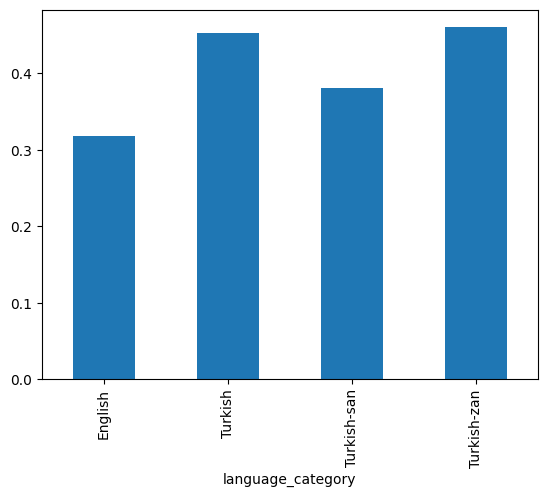

In [33]:
df[df["study_id"] == 1].groupby("language_category")["is_correct"].mean().plot.bar()